## Lab 9
Extraction de primitives

In [1]:
from skimage import feature, data, filters
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1
Essayer de détecter des coins/caractéristiques intéressant avec la méthode Harris. Testez avec différent seuil.

(512, 512) 63 207
(512, 512) -0.5025452245700637 2.1881876429928067
(188, 2) 3 506


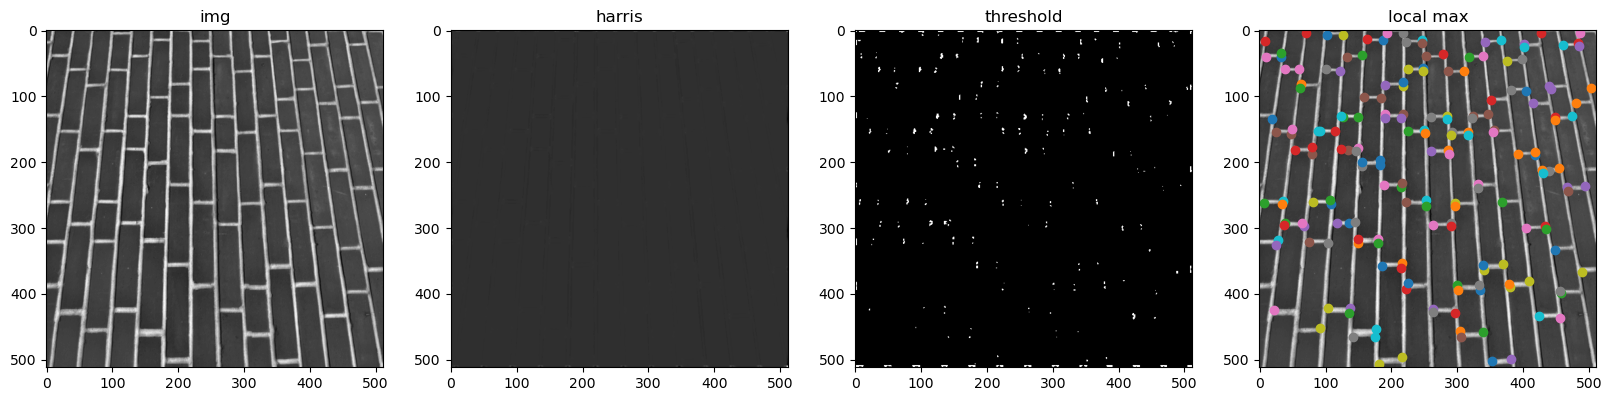

In [ ]:
img = data.brick()
print(img.shape, img.min(), img.max())

plt.figure(figsize=(20, 20))

plt.subplot(141); plt.imshow(img, cmap="gray"); plt.title('img')

harris = feature.corner_harris(img)
print(harris.shape, harris.min(), harris.max())
plt.subplot(142); plt.imshow(harris, cmap="gray"); plt.title('harris')

thresh = harris > 0.01
plt.subplot(143); plt.imshow(thresh, cmap="gray"); plt.title('threshold')

local_max = feature.peak_local_max(img, labels=thresh, min_distance=3)
print(local_max.shape)

#carac = np.zeros_like(img, dtype=bool)
#carac[local_max[:, 0], local_max[:, 1]] = True
plt.subplot(144); plt.imshow(img, cmap="gray"); plt.title('local max')
for line, column in local_max:
    plt.scatter(column, line)

plt.show()

## Exercice 2
Appliquer un filtre détecteur de forme pour faire resortir les contours continus (lignes/tubes) dans l'image.

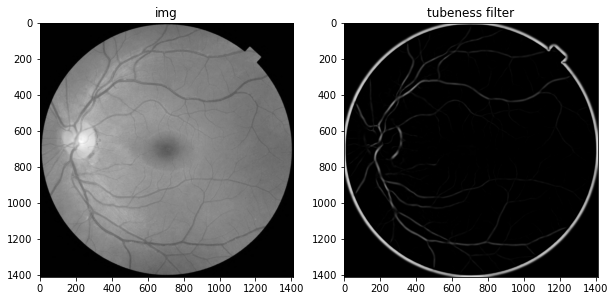

In [25]:
img = data.retina().mean(axis=2)
plt.figure(figsize=(10, 10))
plt.subplot(121); plt.imshow(img, cmap="gray"); plt.title("img")
plt.subplot(122); plt.imshow(filters.frangi(img), cmap="gray"); plt.title("tubeness filter")
plt.show()

## Exercice 3
Calculer le tenseur (H) pour `sub_img`.

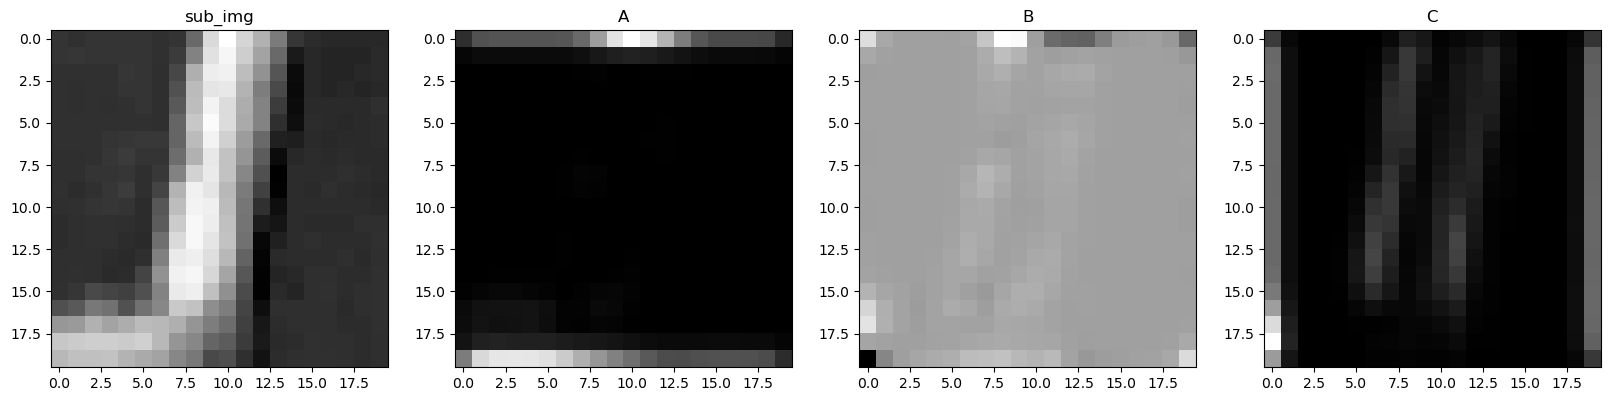

In [5]:
sub_img = img[:20, :20]

plt.figure(figsize=(20, 20))

plt.subplot(141); plt.imshow(sub_img, cmap='gray'); plt.title('sub_img')

a, b, c = feature.structure_tensor(sub_img, sigma=0.5)
plt.subplot(142); plt.imshow(a, cmap='gray'); plt.title('A')
plt.subplot(143); plt.imshow(b, cmap='gray'); plt.title('B')
plt.subplot(144); plt.imshow(c, cmap='gray'); plt.title('C')

plt.show()